## Intro
This machine learning project focuses on predicting default payments among clients in Taiwan. Using real-world data, the project aims to build a predictive model to identify whether a client is likely to default on their payment, enabling informed decision-making and risk assessment for financial institutions.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing and cleaning the data

In [4]:
pd.read_excel('default of credit card clients.xls')

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
original_df = pd.read_excel('default of credit card clients.xls', header = 1)
df = original_df.copy()

In [6]:
df.head(11)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
print(df['default payment next month'].value_counts())
print(df['EDUCATION'].value_counts())
print(df['MARRIAGE'].value_counts())

default payment next month
0    23364
1     6636
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


The dataset does not provide any details about the categories "6" and "0" for education, or "0" for marriage. These are most likely data entry errors. Since their occurrence is minimal, the best approach would be to remove these entries from the dataset to maintain data integrity and avoid noise in the analysis.

In [11]:
df = df[~df['EDUCATION'].isin([0,5,6])]
df = df[df['MARRIAGE'] != 0]

In [12]:
print(df['EDUCATION'].value_counts())
print(df['MARRIAGE'].value_counts())

EDUCATION
2    14024
1    10581
3     4873
4      123
Name: count, dtype: int64
MARRIAGE
2    15806
1    13477
3      318
Name: count, dtype: int64


In [13]:
for col in df.columns:
    if df[col].dtype == 'int64':
        print(f"{col}: {df[col].unique()}")

ID: [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL: [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  380000  310000  150000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  490000  390000  580000  600000  410000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX: [2 1]
EDUCATION: [2 1 3 4]
MARRIAGE: [1 2 3]
AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 42 43 45 46 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 62 66 70
 72 64 65 71 69 68 79 74]
PAY_0: [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2: [ 2  0 -1

In [14]:
print(df.isin(['Unknown']).sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [15]:
df.shape

(29601, 25)

In [16]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [17]:
df = df.drop('ID',axis=1)

In [18]:
df = df.rename(columns = {'LIMIT_BAL':'Credit_Limit','SEX':'Sex','EDUCATION':'Education_Lvl','MARRIAGE':'Marriage','AGE':'Age',
                    'PAY_0':'Pay_Stat_Sep', 'PAY_2':'Pay_Stat_Aug', 'PAY_3':'Pay_Stat_Jul', 'PAY_4':'Pay_Stat_Jun', 
                    'PAY_5':'Pay_Stat_May', 'PAY_6':'Pay_Stat_Apr','BILL_AMT1':'Bill_Amt_Sep','BILL_AMT2':'Bill_Amt_Aug',
                    'BILL_AMT3':'Bill_Amt_Jul','BILL_AMT4':'Bill_Amt_Jun','BILL_AMT5':'Bill_Amt_May','BILL_AMT6':'Bill_Amt_Apr',
                    'PAY_AMT1':'Pay_Amt_Sep','PAY_AMT2':'Pay_Amt_Aug','PAY_AMT3':'Pay_Amt_Jul','PAY_AMT4':'Pay_Amt_Jun','PAY_AMT5':'Pay_Amt_May',
                    'PAY_AMT6':'Pay_Amt_Apr','default payment next month':'Default_Payment'})

In [19]:
df.tail(11)

,Credit_Limit,Sex,Education_Lvl,Marriage,Age,Pay_Stat_Sep,Pay_Stat_Aug,Pay_Stat_Jul,Pay_Stat_Jun,Pay_Stat_May,...,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sep,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr,Default_Payment
29989,150000,1,1,2,35,-1,-1,-1,-1,-1,...,780,0,0,9054,0,783,0,0,0,0
29990,140000,1,2,1,41,0,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29991,210000,1,2,1,34,3,2,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29992,10000,1,3,1,43,0,0,0,-2,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,100000,1,1,2,38,0,-1,-1,0,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29994,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


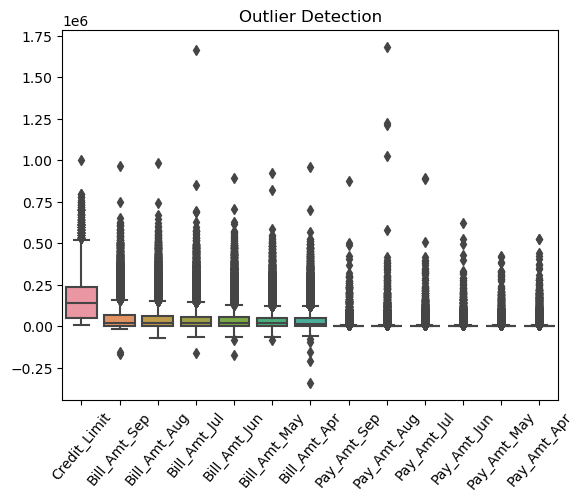

In [20]:
outlier_data = df[['Credit_Limit','Bill_Amt_Sep','Bill_Amt_Aug','Bill_Amt_Jul','Bill_Amt_Jun',
                    'Bill_Amt_May','Bill_Amt_Apr','Pay_Amt_Sep','Pay_Amt_Aug','Pay_Amt_Jul',
                    'Pay_Amt_Jun','Pay_Amt_May','Pay_Amt_Apr']]
sns.boxplot(data=outlier_data)
plt.title('Outlier Detection')
plt.xticks(rotation=50);

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
df.head(11)

,Credit_Limit,Sex,Education_Lvl,Marriage,Age,Pay_Stat_Sep,Pay_Stat_Aug,Pay_Stat_Jul,Pay_Stat_Jun,Pay_Stat_May,...,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sep,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr,Default_Payment
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [23]:
outlier_data = ['Credit_Limit','Bill_Amt_Sep','Bill_Amt_Aug','Bill_Amt_Jul','Bill_Amt_Jun',
                'Bill_Amt_May','Bill_Amt_Apr','Pay_Amt_Sep','Pay_Amt_Aug','Pay_Amt_Jul',
                'Pay_Amt_Jun','Pay_Amt_May','Pay_Amt_Apr']

scaler = MinMaxScaler()
df[outlier_data] = scaler.fit_transform(df[outlier_data])

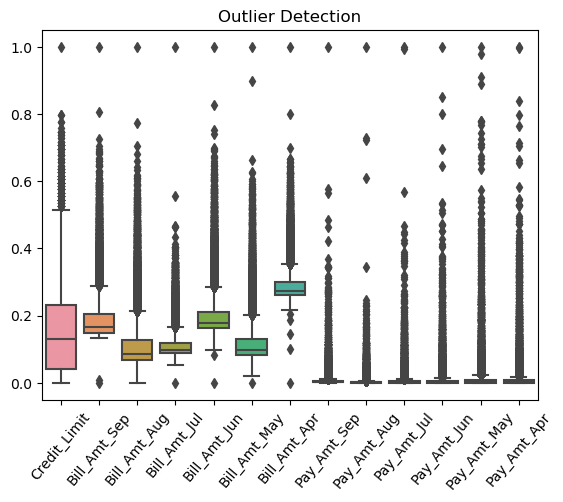

In [24]:
outlier_data = df[['Credit_Limit','Bill_Amt_Sep','Bill_Amt_Aug','Bill_Amt_Jul','Bill_Amt_Jun',
                    'Bill_Amt_May','Bill_Amt_Apr','Pay_Amt_Sep','Pay_Amt_Aug','Pay_Amt_Jul',
                    'Pay_Amt_Jun','Pay_Amt_May','Pay_Amt_Apr']]

sns.boxplot(data=outlier_data)
plt.title('Outlier Detection')
plt.xticks(rotation=50);

C:\Users\Swiss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Swiss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Swiss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Swiss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

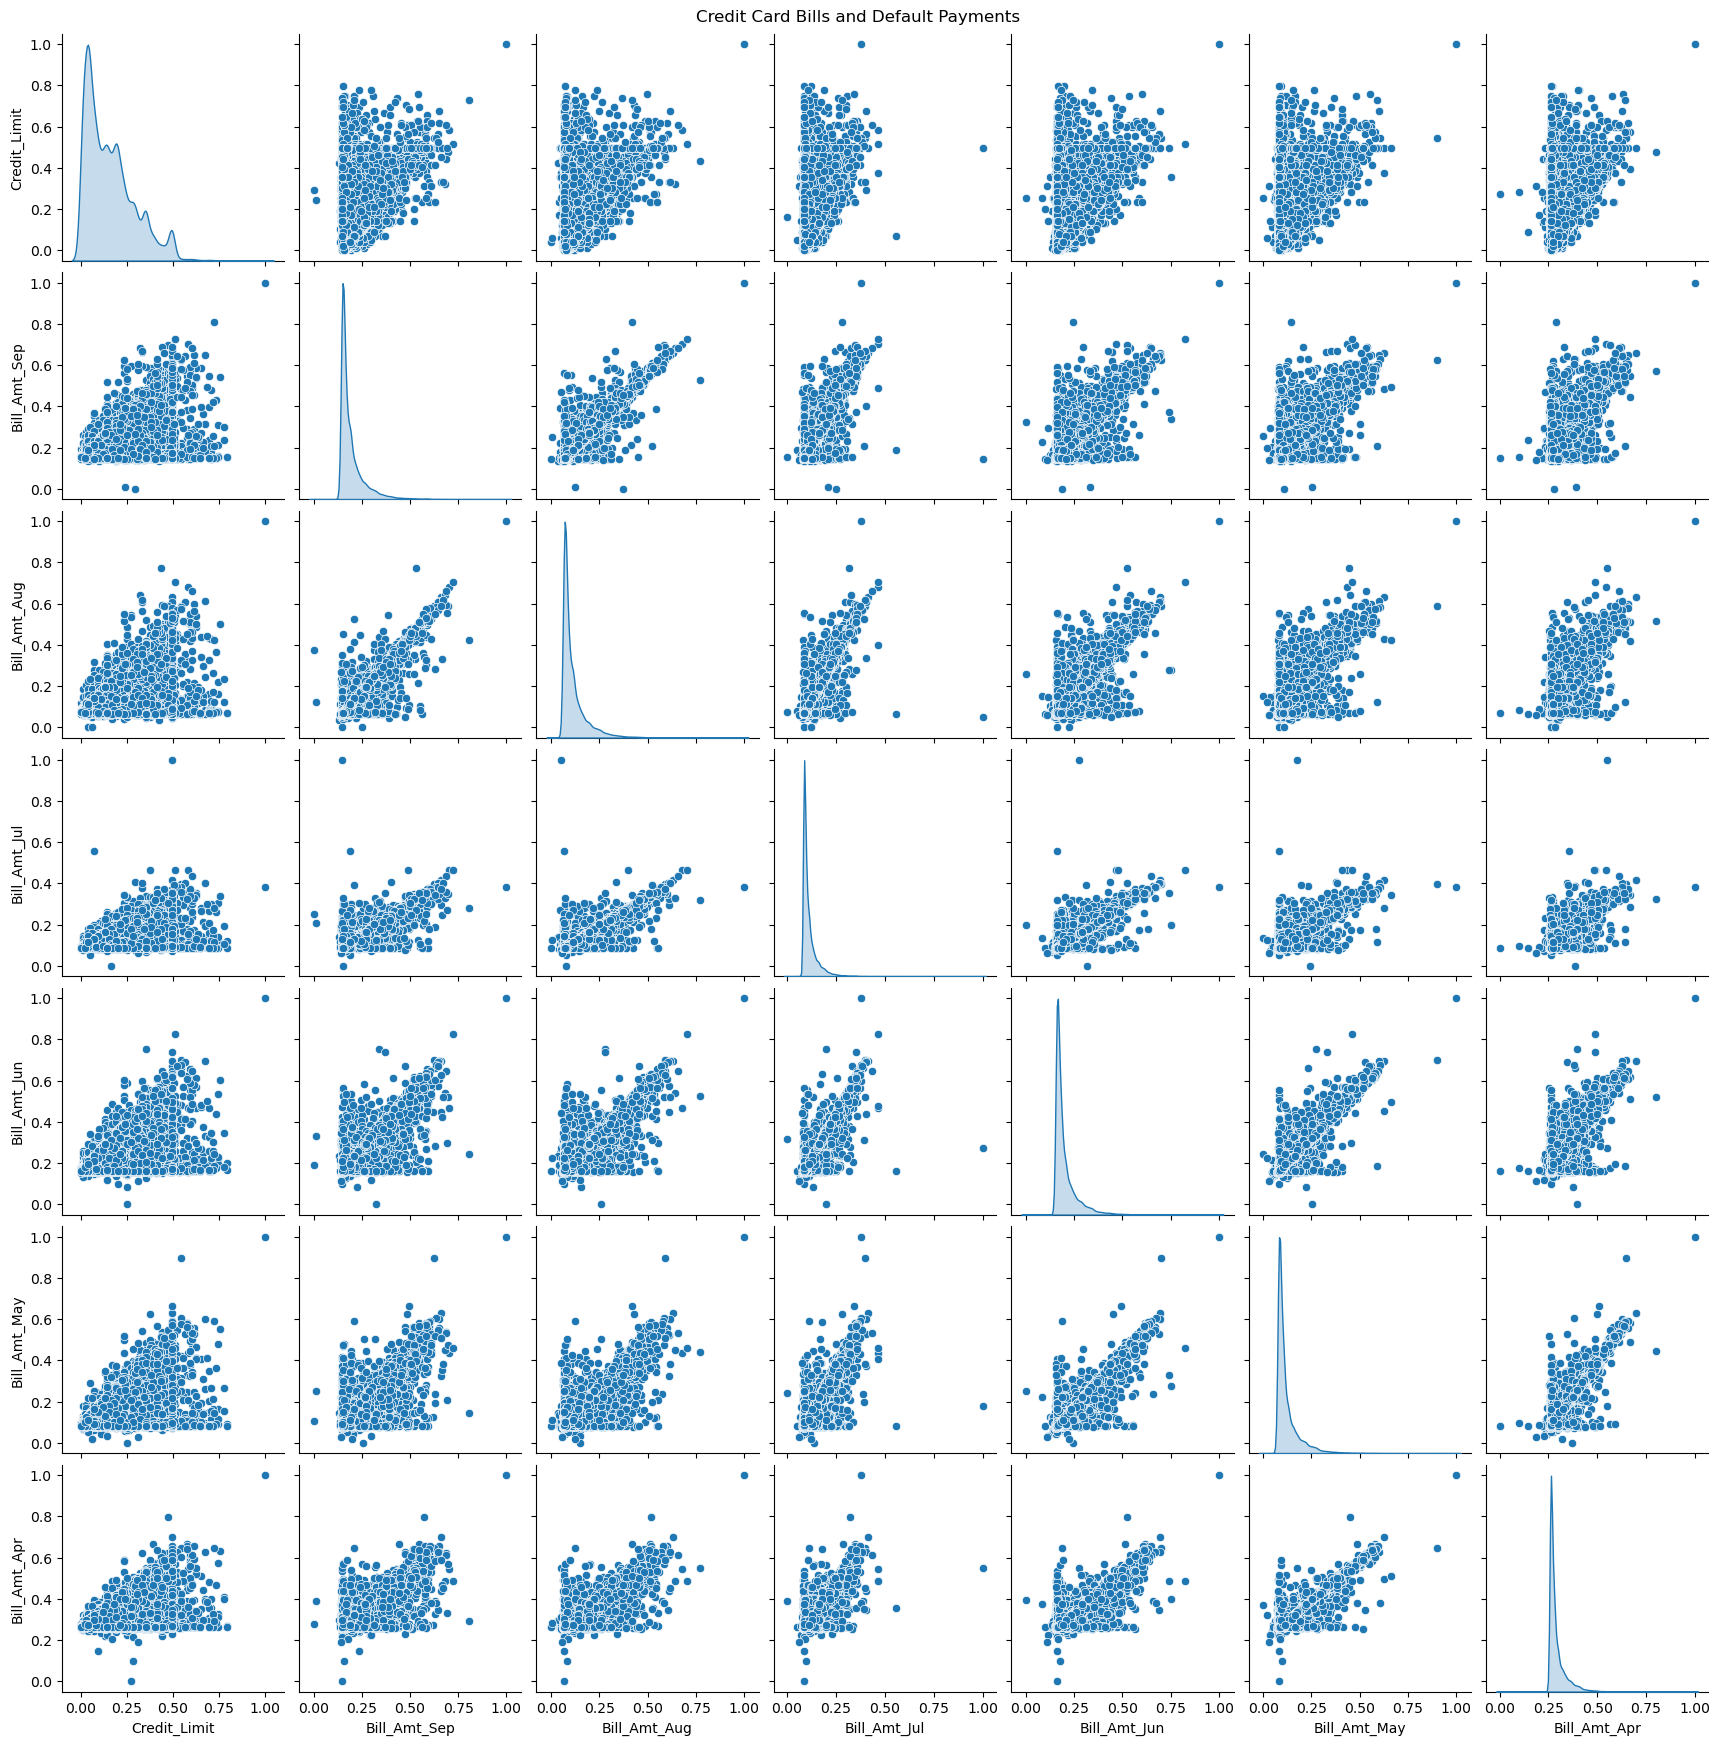

In [25]:
cc_data_bills = df[['Credit_Limit','Bill_Amt_Sep','Bill_Amt_Aug','Bill_Amt_Jul','Bill_Amt_Jun',
                'Bill_Amt_May','Bill_Amt_Apr']]
sns.pairplot(cc_data_bills, diag_kind='kde')
plt.suptitle("Credit Card Bills and Default Payments ", y=1)
plt.show()

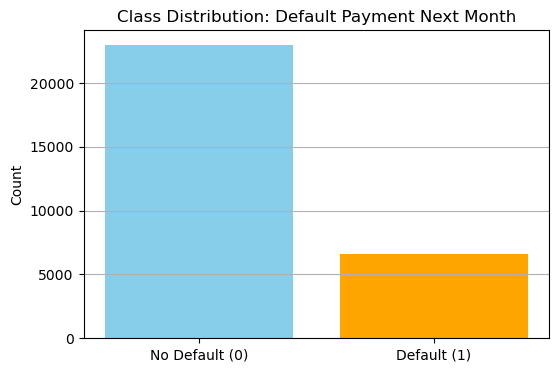

In [26]:
class_counts = df['Default_Payment'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'orange'])
plt.xticks([0, 1], ['No Default (0)', 'Default (1)'])
plt.title("Class Distribution: Default Payment Next Month")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

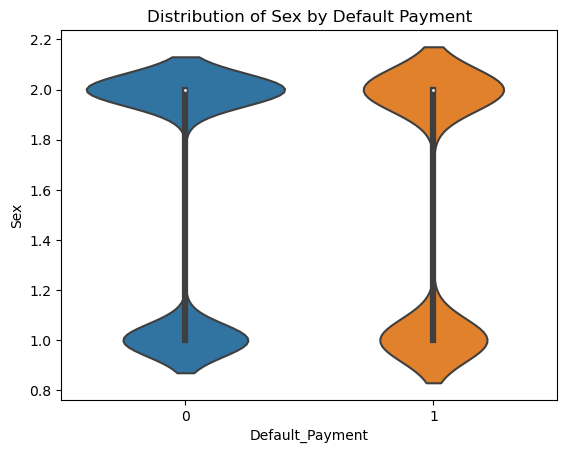

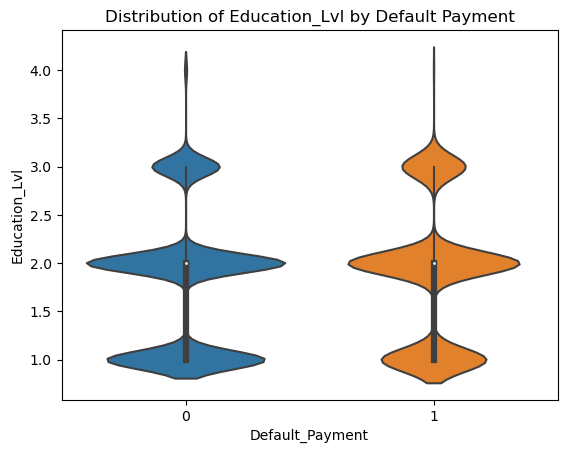

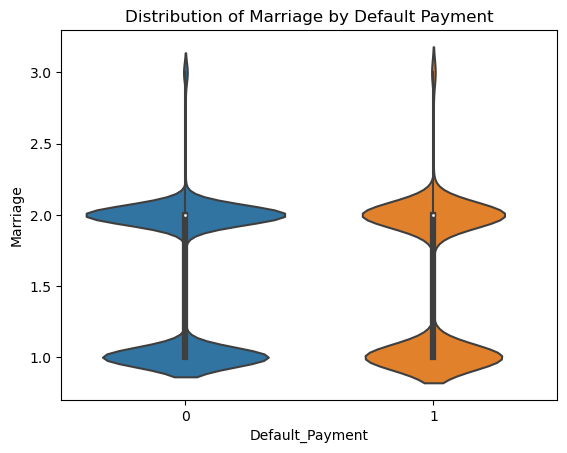

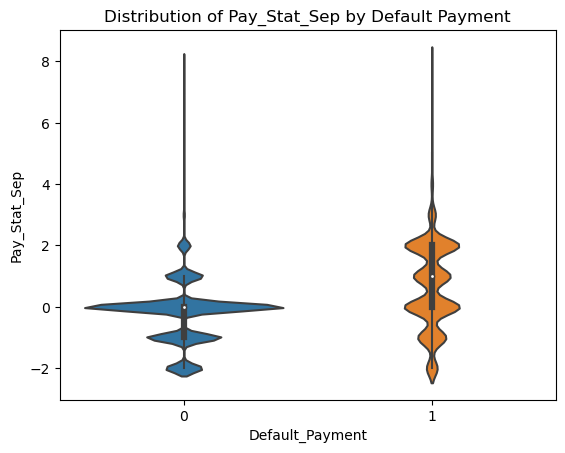

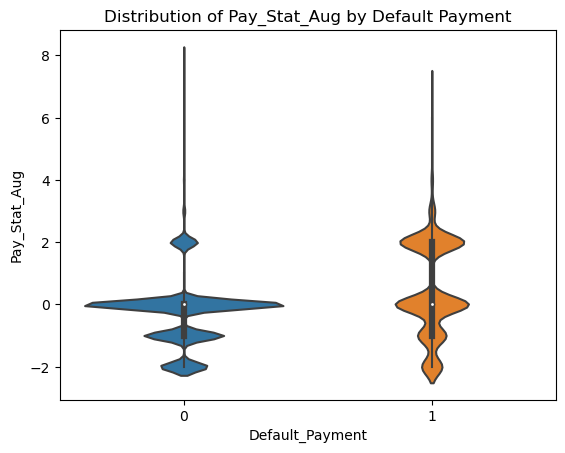

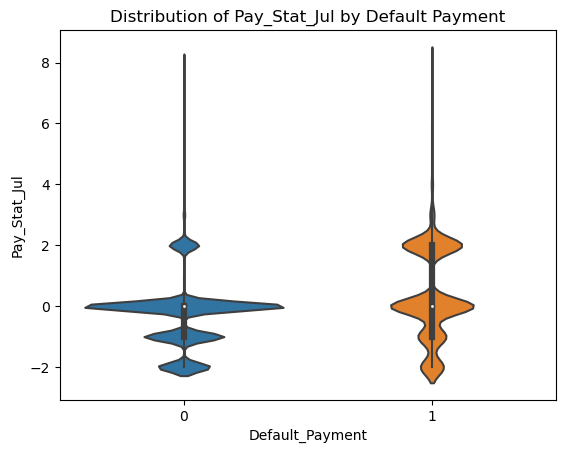

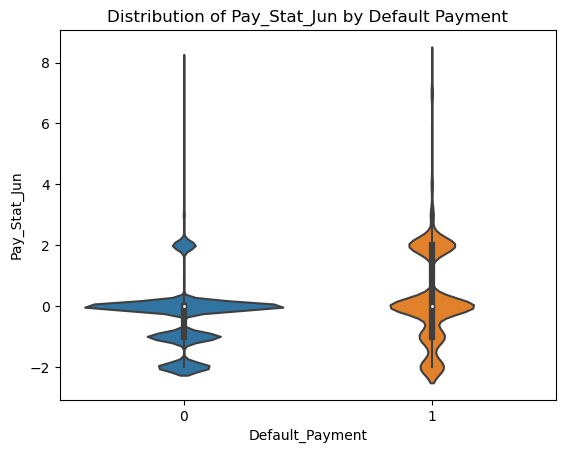

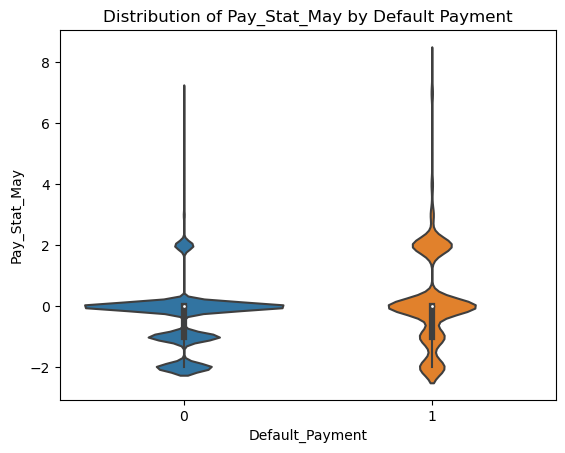

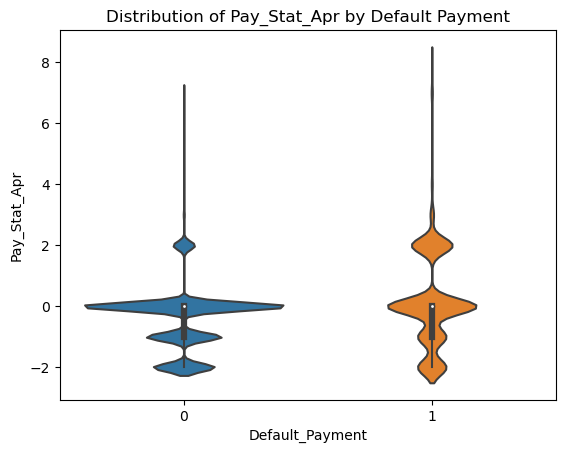

In [27]:
for columns in ['Sex','Education_Lvl','Marriage','Pay_Stat_Sep','Pay_Stat_Aug','Pay_Stat_Jul','Pay_Stat_Jun',
                'Pay_Stat_May','Pay_Stat_Apr']:
    sns.violinplot(data=df, x='Default_Payment', y= columns)
    plt.title(f'Distribution of {columns} by Default Payment')
    plt.show()

From these graphs, we can observe that most individuals who did not default on their payments either made their payments on time or even earlier. Additionally, the data suggests that education level and gender do not play a significant role in defaulting, as their distributions are very similar across default and non-default groups.


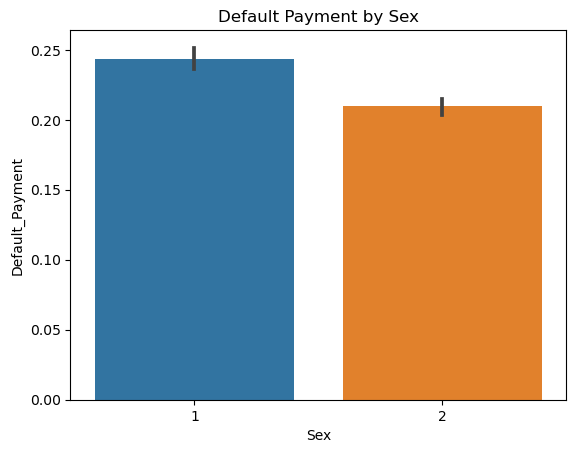

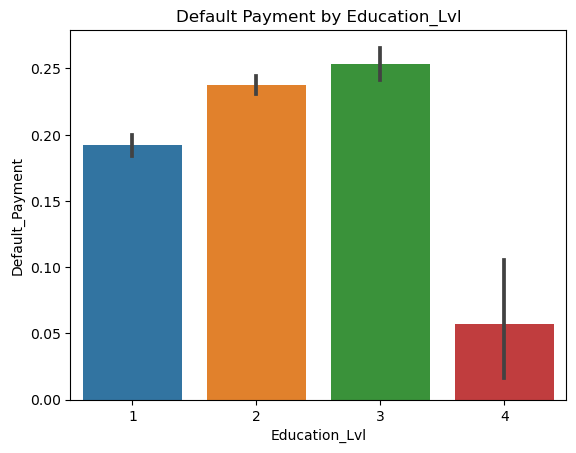

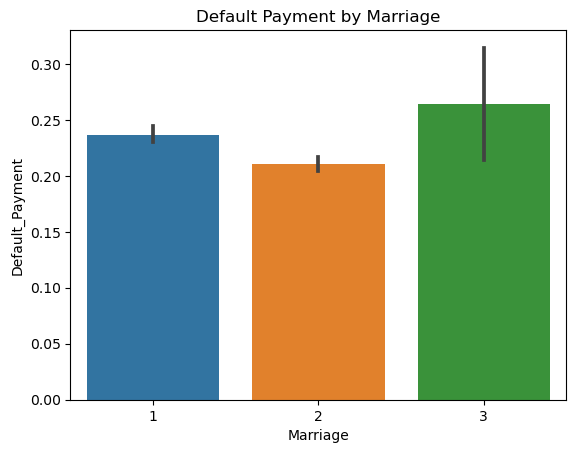

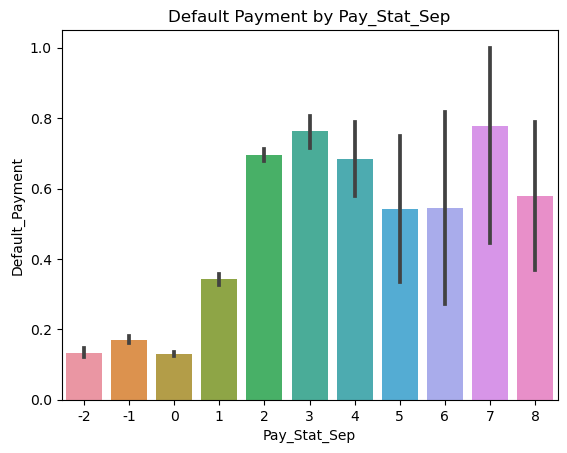

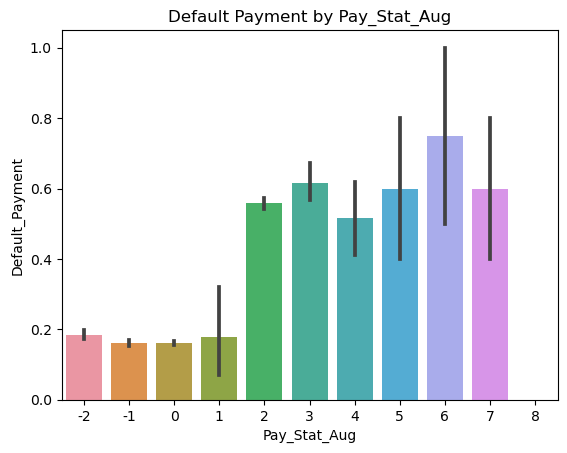

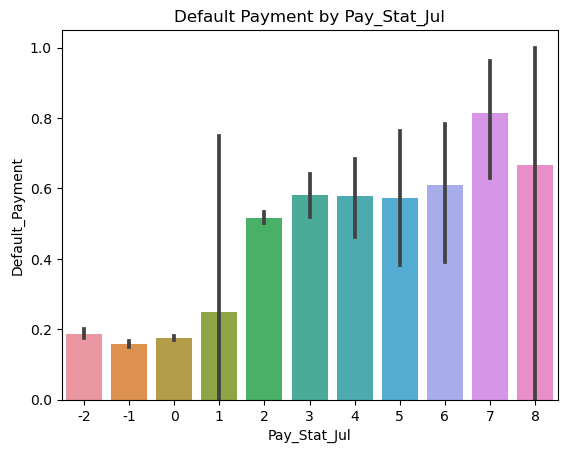

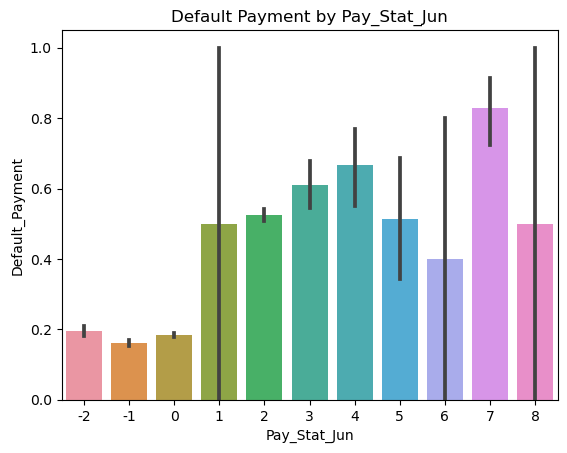

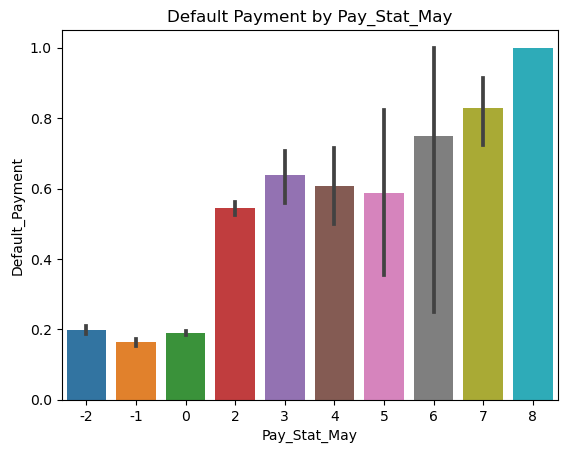

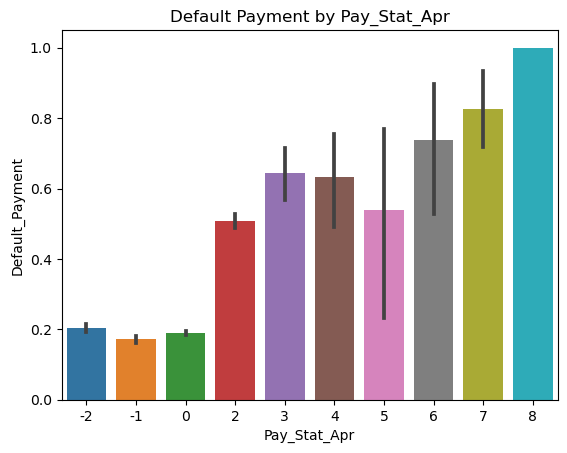

In [29]:
for bars in ['Sex','Education_Lvl','Marriage','Pay_Stat_Sep','Pay_Stat_Aug','Pay_Stat_Jul','Pay_Stat_Jun',
             'Pay_Stat_May','Pay_Stat_Apr']:
    sns.barplot(data=df, x=bars, y ='Default_Payment')
    plt.title(f'Default Payment by {bars}')
    plt.show()


From examining the bars for pay status in July, June, and May, we observe the most variability in default rates. This could be influenced by seasonal factors, as these months fall during summer, which may lead to higher expenses such as vacations or education-related costs. Additionally, it seems that men are slightly more likely to default on their credit cards compared to women.

Surprisingly, the differences between marriage categories 1 (married) and 2 (single) are very close, with 2 being slightly lower than 1. This indicates that marital status does not strongly influence default rates. However, the "Other" category (3) for marriage shows a notably higher default rate, suggesting that this group (potentially including divorced or widowed individuals) may face unique financial challenges.

In [31]:
variables = df[['Credit_Limit','Bill_Amt_Sep','Bill_Amt_Aug','Bill_Amt_Jul','Bill_Amt_Jun',
                'Bill_Amt_May','Bill_Amt_Apr','Pay_Amt_Sep','Pay_Amt_Aug','Pay_Amt_Jul',
                'Pay_Amt_Jun','Pay_Amt_May','Pay_Amt_Apr','Sex','Education_Lvl','Marriage',
                'Pay_Stat_Sep','Pay_Stat_Aug','Pay_Stat_Jul','Pay_Stat_Jun',
                'Pay_Stat_May','Pay_Stat_Apr','Default_Payment']]

Text(0.5, 1.0, 'Negative Correlation With Default Payment')

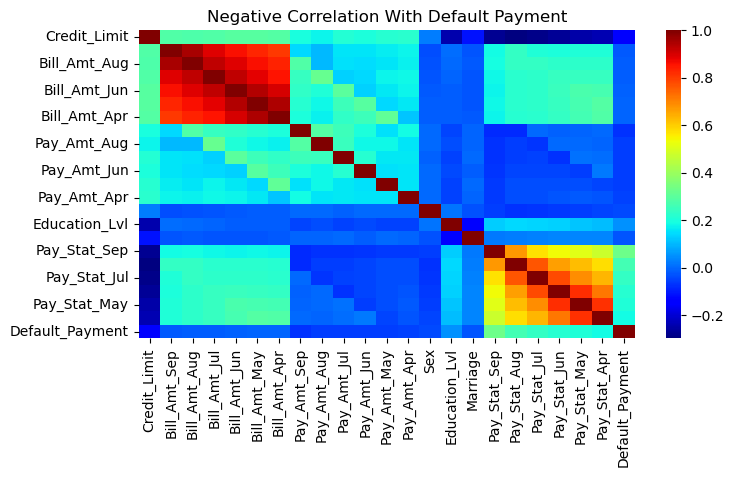

In [32]:
correlations=variables.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlations,cmap='jet',fmt='.3f')
plt.title('Negative Correlation With Default Payment')

From this heatmap, we can observe that payment status has the strongest correlation with default rates, with September being the most influential month. This could be due to the recency of the data, as September is the last recorded month, making it highly indicative of the client's current financial behavior. While earlier months like August and July also show meaningful correlations, the effect diminishes slightly with time. Overall, payment status stands out as the primary variable affecting default rates.

In [34]:
df.to_csv('preprocessed_cc.csv')

In [35]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
import keras_tuner as kt
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam 
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
Features = ['Education_Lvl','Pay_Stat_Sep','Pay_Stat_Aug','Pay_Stat_Jul','Pay_Stat_Jun','Pay_Stat_May','Pay_Stat_Apr']

In [37]:
X = df[Features].values
y = df['Default_Payment'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [38]:
def build_model(hp):
    model = Sequential()
    
    model.add(LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=False
    ))

    model.add(Dropout(
        rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model 

In [39]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose =1
)


In [40]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train.flatten()
)
class_weights_dict = dict(enumerate(class_weights))


tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 30,
    directory ='rnn_tuning_lstm',
    project_name='credit_card_default_lstmv1'
)

tuner.search(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=64)

best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from rnn_tuning_lstm\credit_card_default_lstmv1\tuner0.json



C:\Users\Swiss\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Swiss\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
best_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

Epoch 1/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7994 - loss: 0.6288 - val_accuracy: 0.7844 - val_loss: 0.5553
Epoch 2/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7838 - loss: 0.5795 - val_accuracy: 0.7827 - val_loss: 0.5536
Epoch 3/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7793 - loss: 0.5812 - val_accuracy: 0.7815 - val_loss: 0.5529
Epoch 4/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7807 - loss: 0.5747 - val_accuracy: 0.7732 - val_loss: 0.5795
Epoch 5/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7796 - loss: 0.5767 - val_accuracy: 0.7827 - val_loss: 0.5568
Epoch 6/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7766 - loss: 0.5784 - val_accuracy: 0.7812 - val_loss: 0.5562
Epoch 7/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7795 - loss: 0.5735 - val_accuracy: 0.7834 - val_loss: 0.5593
Epoch 8/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7810 - loss: 0.5741 - val_accuracy: 0.

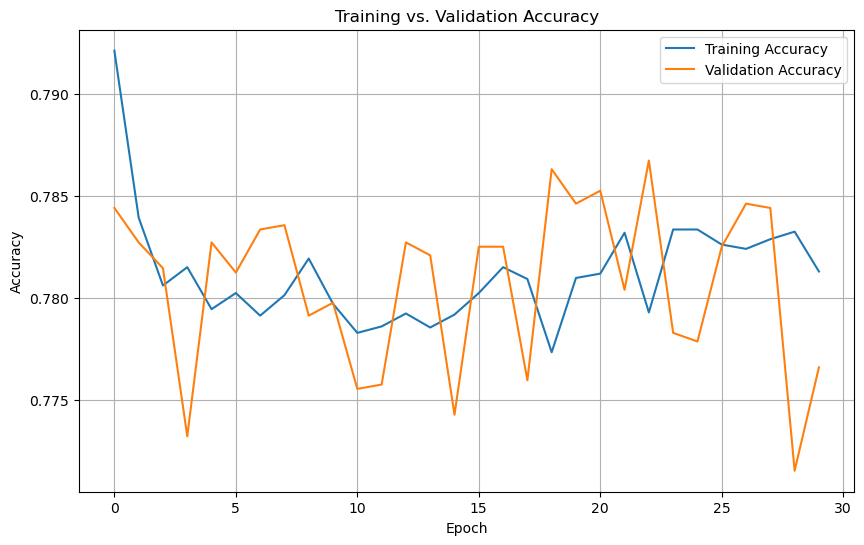

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


The LSTM is displaying some signs of overfitting which was mitigated using earlystopping 

In [43]:
val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)

best_model.save("best_model_lstm.keras")

with open("lstm_results.txt", "w") as f:
    f.write("Model: LSTM\n")
    f.write(f"Validation Accuracy: {val_accuracy:.4f}\n")
    f.write(f"Validation Loss: {val_loss:.4f}\n")

In [44]:
def build_gru_model(hp):
    model = Sequential()

    model.add(GRU(
        units=hp.Int('gru_units', min_value=32, max_value=128, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=False
    ))

    model.add(Dropout(
        rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    ))

    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [45]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

In [46]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train.flatten()
)
class_weights_dict = dict(enumerate(class_weights))


tuner_gru = kt.RandomSearch(
    build_gru_model,
    objective='val_accuracy',
    max_trials=30,
    directory='rnn_tuning_gru',
    project_name='credit_card_default_gruv1'
)

tuner_gru.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64
)

best_gru_model = tuner_gru.get_best_models(num_models=1)[0]

Reloading Tuner from rnn_tuning_gru\credit_card_default_gruv1\tuner0.json


C:\Users\Swiss\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Swiss\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [47]:
best_gru_model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

history = best_gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

Epoch 1/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8129 - loss: 0.6431 - val_accuracy: 0.7851 - val_loss: 0.5657
Epoch 2/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7809 - loss: 0.5776 - val_accuracy: 0.7834 - val_loss: 0.5550
Epoch 3/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7825 - loss: 0.5811 - val_accuracy: 0.7834 - val_loss: 0.5523
Epoch 4/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7742 - loss: 0.5895 - val_accuracy: 0.7884 - val_loss: 0.5426
Epoch 5/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7845 - loss: 0.5766 - val_accuracy: 0.7789 - val_loss: 0.5709
Epoch 6/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7826 - loss: 0.5775 - val_accuracy: 0.7827 - val_loss: 0.5516
Epoch 7/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7804 - loss: 0.5727 - val_accuracy: 0.7808 - val_loss: 0.5531
Epoch 8/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7766 - loss: 0.5799 - val_accuracy: 0.

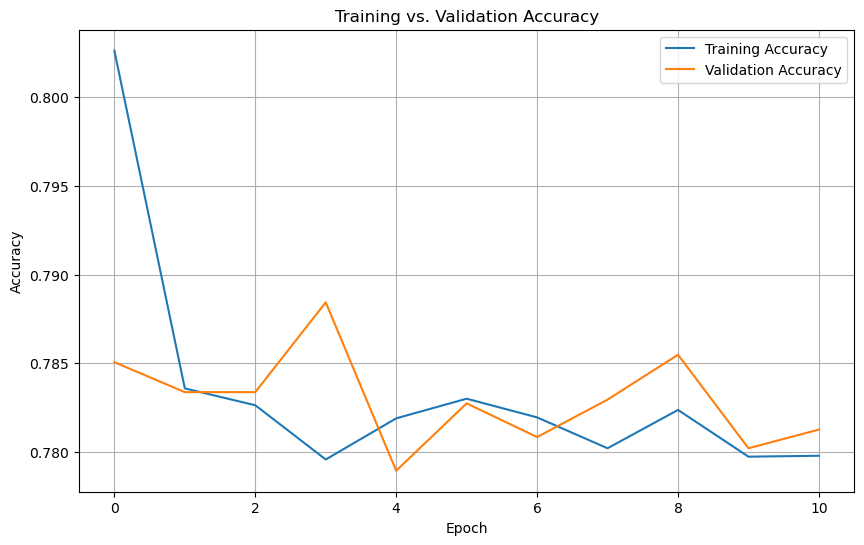

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

It looks like the GRU model might be slightly underfitting 
further tuning will probably be required 

In [49]:
val_loss, val_accuracy = best_gru_model.evaluate(X_val, y_val, verbose=0)

best_gru_model.save("best_model_gru.keras")

with open("gru_results.txt", "w") as f:
    f.write("Model: GRU\n")
    f.write(f"Validation Accuracy: {val_accuracy:.4f}\n")
    f.write(f"Validation Loss: {val_loss:.4f}\n")

In [50]:
def load_results(file_path):
    with open(file_path, 'r') as f:
        return f.read()

lstm_results = load_results("lstm_results.txt")
gru_results = load_results("gru_results.txt")

print(lstm_results)

print(gru_results)

Model: LSTM
Validation Accuracy: 0.7844
Validation Loss: 0.5412

Model: GRU
Validation Accuracy: 0.7884
Validation Loss: 0.5426



In [51]:
lstm_model = tf.keras.models.load_model("best_model_lstm.keras")
lstm_preds = (lstm_model.predict(X_val) > 0.5).astype(int)

gru_model = tf.keras.models.load_model("best_model_gru.keras")
gru_preds = (gru_model.predict(X_val) > 0.5).astype(int)

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step


In [52]:
print("LSTM Classification Report")
print(classification_report(y_val, lstm_preds, digits=4))

print("\n GRU Classification Report")
print(classification_report(y_val, gru_preds, digits=4))

LSTM Classification Report
              precision    recall  f1-score   support

           0     0.8728    0.8481    0.8603      3707
           1     0.5035    0.5549    0.5280      1029

    accuracy                         0.7844      4736
   macro avg     0.6882    0.7015    0.6941      4736
weighted avg     0.7926    0.7844    0.7881      4736


 GRU Classification Report
              precision    recall  f1-score   support

           0     0.8713    0.8562    0.8637      3707
           1     0.5124    0.5442    0.5278      1029

    accuracy                         0.7884      4736
   macro avg     0.6918    0.7002    0.6957      4736
weighted avg     0.7933    0.7884    0.7907      4736



In [54]:
lstm_model = load_model("best_model_lstm.keras")
gru_model = load_model("best_model_gru.keras")

lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test, y_test, verbose=0)
gru_test_loss, gru_test_acc = gru_model.evaluate(X_test, y_test, verbose=0)

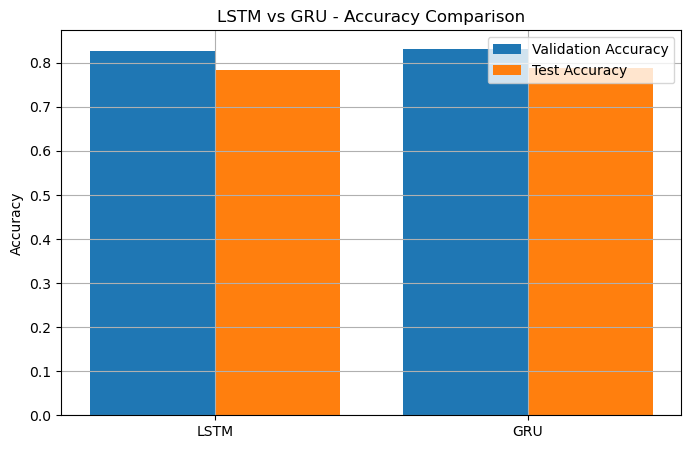

In [56]:
models = ['LSTM', 'GRU']
val_accuracies = [0.8271,0.8321]
test_accuracies = [lstm_test_acc, gru_test_acc]

x = range(len(models))

plt.figure(figsize=(8,5))
plt.bar(x, val_accuracies, width=0.4, label='Validation Accuracy', align='center')
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel("Accuracy")
plt.title("LSTM vs GRU - Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [58]:
lstm_preds = (lstm_model.predict(X_test) > 0.5).astype(int)
gru_preds = (gru_model.predict(X_test) > 0.5).astype(int)

print("LSTM Classification Report:\n")
print(classification_report(y_test, lstm_preds))

print("\nGRU Classification Report:\n")
print(classification_report(y_test, gru_preds))

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
LSTM Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4591
           1       0.52      0.56      0.53      1330

    accuracy                           0.78      5921
   macro avg       0.69      0.70      0.70      5921
weighted avg       0.79      0.78      0.79      5921


GRU Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4591
           1       0.53      0.55      0.54      1330

    accuracy                           0.79      5921
   macro avg       0.70      0.70      0.70      5921
weighted avg       0.79      0.79      0.79      5921



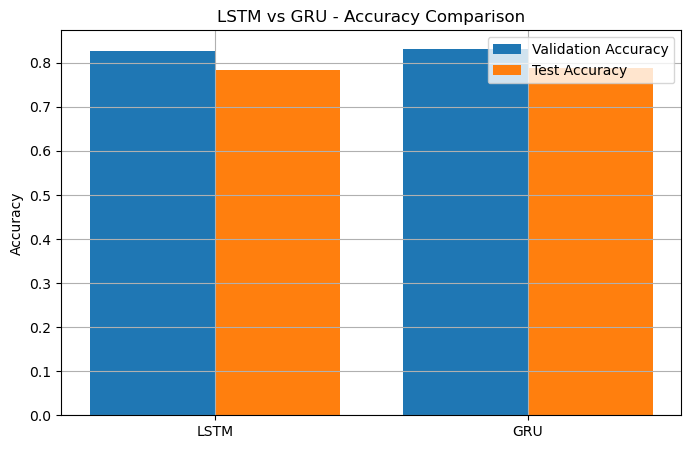

In [59]:
models = ['LSTM', 'GRU']
test_accuracies = [lstm_test_acc, gru_test_acc]
val_accuracies = [0.8271, 0.8321]

x = range(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x, val_accuracies, width=0.4, label='Validation Accuracy', align='center')
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel("Accuracy")
plt.title("LSTM vs GRU - Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()